# TRABALHO FINAL DA DISCIPLINA DE CIÊNCIAS DE DADOS DO PPGTI

Discentes: 
      
      
      Bruna Alice Oliveira de Brito

      Jonathan Alberto Toledo Silva

Os dados utilizados no projeto foram extraídos do sigsaúde. O sigsaúde é um conjunto de serviços-escola de saúde integrados numa plataforma computacional que serve à melhoria da gestão de processos e otimização de dados clínicos para fins de pesquisa e formação acadêmica.

In [2]:
#Ativar o drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/drive/MyDrive/TRABALHO_CD_MESTRADO/dados_limpos.csv")
df_copy = pd.read_csv("/content/drive/MyDrive/TRABALHO_CD_MESTRADO/dados_limpos.csv")

In [5]:
df_copy.dropna(inplace=True)

## Pré-Processamento

In [6]:
from datetime import datetime

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [7]:
df.columns

Index(['status', 'denominacao', 'tipo_vinculo-2', 'sigla-2'], dtype='object')

In [45]:
df_copy.head()

,status,denominacao,tipo_vinculo-2,sigla-2,cluster
0,ATENDIDO,NUTRIÇÃO EM ESPORTES E EXERCÍCIO FÍSICO,ALUNO,FACISA,1
1,NAO_COMPARECEU,FISIOTERAPIA,SEM_VINCULO,FACISA,1
2,ATENDIDO,FISIOTERAPIA,SERVIDOR_ATIVO,FACISA,1
3,NAO_COMPARECEU,FISIOTERAPIA,SEM_VINCULO,FACISA,1
4,ATENDIDO,CLÍNICA MÉDICA,SERVIDOR_ATIVO,FACISA,1


In [8]:
df.shape

(3488, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3488 entries, 0 to 3487
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   status          3488 non-null   object
 1   denominacao     3488 non-null   object
 2   tipo_vinculo-2  3474 non-null   object
 3   sigla-2         3488 non-null   object
dtypes: object(4)
memory usage: 109.1+ KB


In [10]:
df.isnull().sum()

status             0
denominacao        0
tipo_vinculo-2    14
sigla-2            0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

status            0
denominacao       0
tipo_vinculo-2    0
sigla-2           0
dtype: int64

In [13]:
for name in df.select_dtypes("object").columns.to_list():
    onehot = OneHotEncoder(sparse=False)
    onehot.fit(df[name].values.reshape(-1,1))

    # Transformar
    df[onehot.get_feature_names_out()] = onehot.transform(df[name].values.reshape(-1,1))
    df.drop(columns=name, axis = 1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3474 entries, 0 to 3487
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   x0_AGENDADO                                 3474 non-null   float64
 1   x0_ATENDIDO                                 3474 non-null   float64
 2   x0_CANCELADO                                3474 non-null   float64
 3   x0_NAO_COMPARECEU                           3474 non-null   float64
 4   x0_ANÁLISES CLÍNICAS                        3474 non-null   float64
 5   x0_CLÍNICA MÉDICA                           3474 non-null   float64
 6   x0_DERMATOLOGIA                             3474 non-null   float64
 7   x0_ENDOCRINOLOGIA E METABOLOGIA             3474 non-null   float64
 8   x0_ENFERMAGEM                               3474 non-null   float64
 9   x0_FISIOTERAPIA                             3474 non-null   float64
 10  x0_FISIOTERA

In [15]:
df.shape

(3474, 43)

### Normalização

In [16]:
scaler = MinMaxScaler()
df_normali = scaler.fit_transform(df)
df = pd.DataFrame(df_normali, columns=df.columns)

In [17]:
df.head()

,x0_AGENDADO,x0_ATENDIDO,x0_CANCELADO,x0_NAO_COMPARECEU,x0_ANÁLISES CLÍNICAS,x0_CLÍNICA MÉDICA,x0_DERMATOLOGIA,x0_ENDOCRINOLOGIA E METABOLOGIA,x0_ENFERMAGEM,x0_FISIOTERAPIA,...,x0_SERVIDOR_ATIVO,x0_TERCEIRIZADO,x0_CB,x0_CCS-DFST,x0_DAS,x0_DASE,x0_EMCM,x0_FACISA,x0_IMD,x0_NIAN
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Clusterização

In [18]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from statistics import mean
from sklearn.mixture import GaussianMixture #EM
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
medias_silhoueta = []
medias_db = []

## Silhouette 3 técnicas


O código apresentado realiza uma avaliação da qualidade dos modelos de cluster Hierárquico, k-Means e EM usando a métrica de silhueta para diferentes valores de k (número de clusters). O resultado é a impressão do valor da métrica de silhueta correspondente para cada modelo e cada valor de k.

K-MEANS

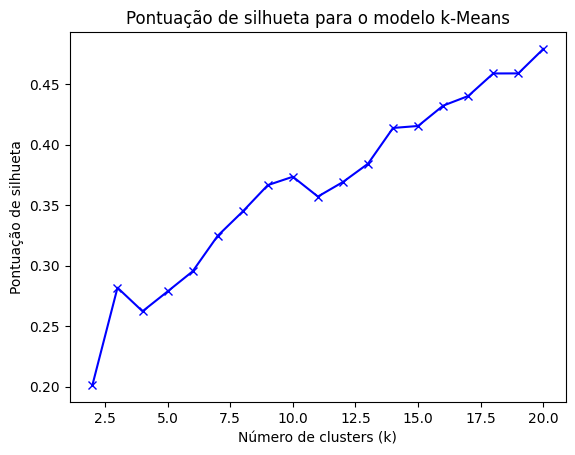

In [20]:
# criar listas vazias para as pontuações de silhueta e valores de k
silhouette_scores_kmeans = []
k_values = []

for k in range(2, 21):

    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=300, max_iter=10, random_state=42)
    kmeans.fit(df)
    # calcular a pontuação de silhueta para o modelo
    score = silhouette_score(df, kmeans.labels_, metric='euclidean')

    silhouette_scores_kmeans.append(score)
    k_values.append(k)
    if k == 3:
      medias_silhoueta.append(score)

# criar um gráfico de linha para mostrar as pontuações de silhueta em função de k
plt.plot(k_values, silhouette_scores_kmeans, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Pontuação de silhueta')
plt.title('Pontuação de silhueta para o modelo k-Means')
plt.show()

HIERARQUICO

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

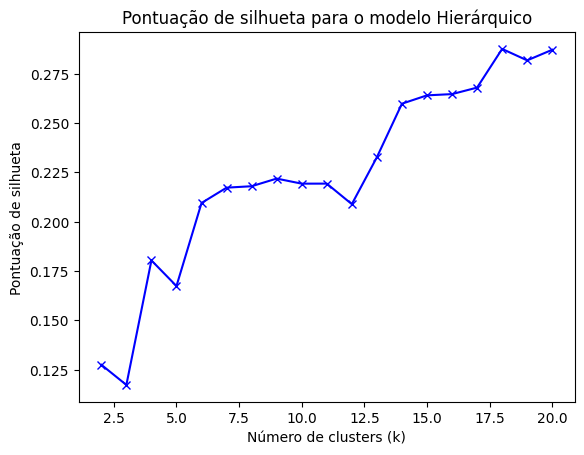

In [21]:
silhouette_scores_hie = []
k_values = []

for k in range(2, 21):

    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    cluster.fit(df)
    
    # calcular a pontuação de silhueta para o modelo
    score = silhouette_score(df, cluster.labels_, metric='euclidean')
    # adicionar a pontuação de silhueta e valor de k às listas
    silhouette_scores_hie.append(score)
    k_values.append(k)
    if k == 3:
      medias_silhoueta.append(score)


# criar um gráfico de linha para mostrar as pontuações de silhueta em função de k
plt.plot(k_values, silhouette_scores_hie, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Pontuação de silhueta')
plt.title('Pontuação de silhueta para o modelo Hierárquico')
plt.show()

EM

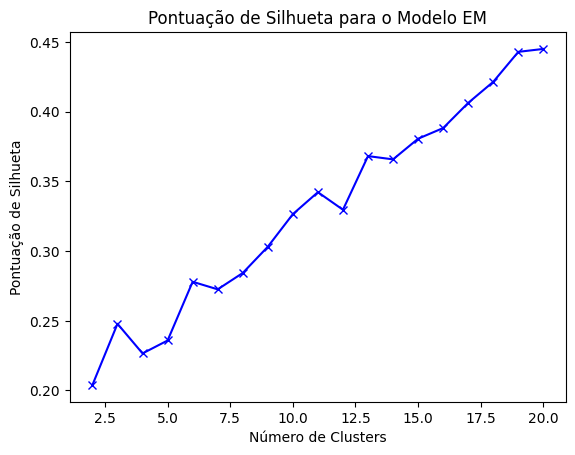

In [22]:
scores = []

for k in range(2, 21):
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    labels = gmm.fit_predict(df)
    score = silhouette_score(df, labels)
    scores.append(score)
    if k == 3:
      medias_silhoueta.append(score)


plt.plot(k_values, scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação de Silhueta')
plt.title('Pontuação de Silhueta para o Modelo EM')
plt.show()


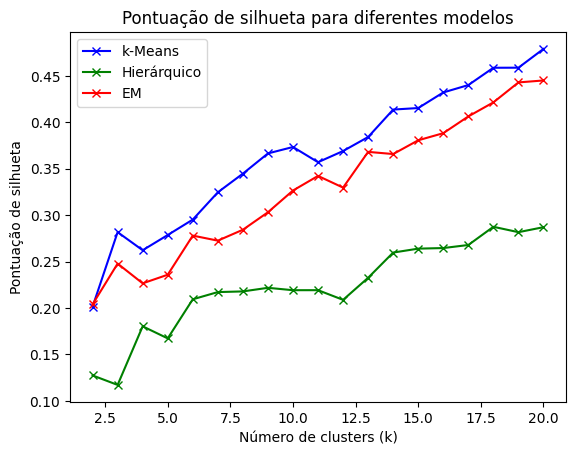

In [23]:
# Criar um único gráfico com as pontuações de silhueta para cada modelo
plt.plot(k_values, silhouette_scores_kmeans, 'bx-', label='k-Means')
plt.plot(k_values, silhouette_scores_hie, 'gx-', label='Hierárquico')
plt.plot(k_values, scores, 'rx-', label='EM')

plt.xlabel('Número de clusters (k)')
plt.ylabel('Pontuação de silhueta')
plt.title('Pontuação de silhueta para diferentes modelos')
plt.legend()
plt.show()


## DB 3 técicas

K-MEANS

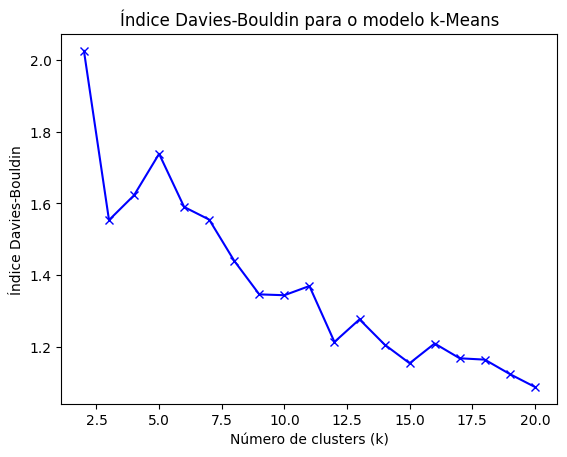

In [24]:
db_scores = []
k_values = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=300, max_iter=10, random_state=42)
    kmeans.fit(df)
    score = davies_bouldin_score(df, kmeans.labels_)
    db_scores.append(score)
    k_values.append(k)
    if k == 3:
      medias_db.append(score)




plt.plot(k_values, db_scores, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Índice Davies-Bouldin')
plt.title('Índice Davies-Bouldin para o modelo k-Means')
plt.show()

HIERARQUICO

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

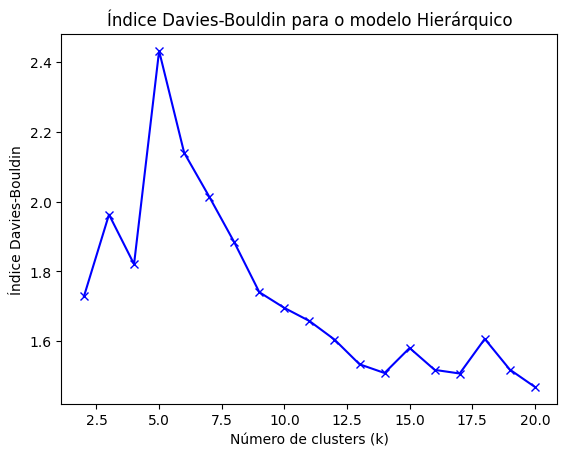

In [25]:
db_scores_hie = []
k_values = []

for k in range(2, 21):

    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    cluster.fit(df)
    
    score = davies_bouldin_score(df, cluster.labels_)

    # adicionar a pontuação de silhueta e valor de k às listas
    db_scores_hie.append(score)
    k_values.append(k)
    if k == 3:
      medias_db.append(score)


# criar um gráfico de linha para mostrar as pontuações de silhueta em função de k
plt.plot(k_values, db_scores_hie, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Índice Davies-Bouldin')
plt.title('Índice Davies-Bouldin para o modelo Hierárquico')
plt.show()

EM

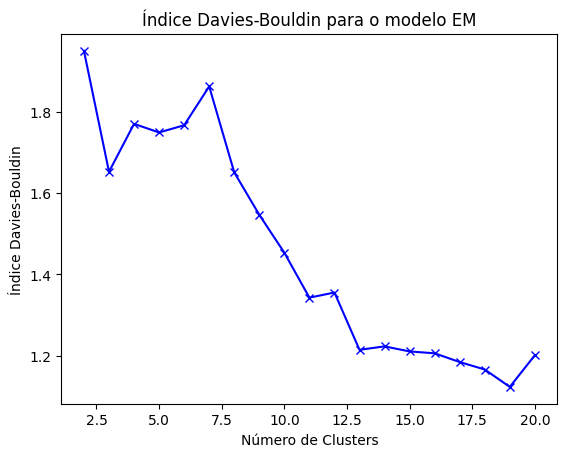

In [26]:
scores = []

for k in range(2, 21):
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    labels = gmm.fit_predict(df)
    score = davies_bouldin_score(df, labels)
    scores.append(score)
    if k == 3:
      medias_db.append(score)

plt.plot(k_values, scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice Davies-Bouldin')
plt.title('Índice Davies-Bouldin para o modelo EM')
plt.show()

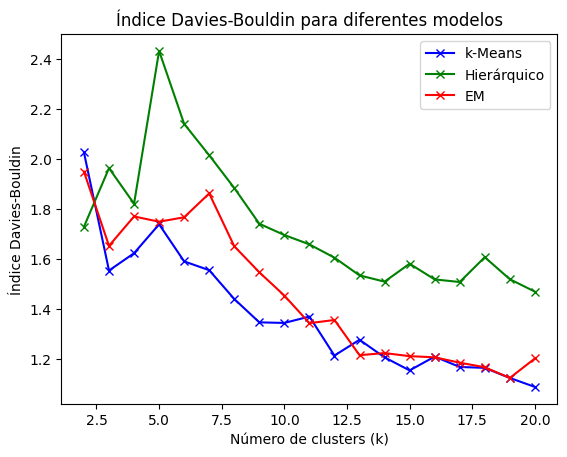

In [27]:
# Criar um único gráfico com as pontuações de índice Davies-Bouldin para cada modelo
plt.plot(k_values, db_scores, 'bx-', label='k-Means')
plt.plot(k_values, db_scores_hie, 'gx-', label='Hierárquico')
plt.plot(k_values, scores, 'rx-', label='EM')

plt.xlabel('Número de clusters (k)')
plt.ylabel('Índice Davies-Bouldin')
plt.title('Índice Davies-Bouldin para diferentes modelos')
plt.legend()
plt.show()

## Média

In [41]:
print(medias_silhoueta)
print()
print(medias_db)

[0.28172098992970973, 0.1172105038172114, 0.24785172651455917]

[1.5533471244457815, 1.9629107361719769, 1.652029738655054]


In [64]:
from tabulate import tabulate

k = 3

# Organizar os dados em uma lista de listas
dados = [[' ', 'Score Silhueta', 'Score do Índice Davies-Bouldin'],
         ['K-MEANS', medias_silhoueta[0], medias_db[0]],
         ['HIERARQUICO',medias_silhoueta[1], medias_db[1]],
         ['EM',medias_silhoueta[2], medias_db[2]]]

# Imprimir a tabela
print(tabulate(dados, headers='firstrow'))

               Score Silhueta    Score do Índice Davies-Bouldin
-----------  ----------------  --------------------------------
K-MEANS              0.281721                           1.55335
HIERARQUICO          0.117211                           1.96291
EM                   0.247852                           1.65203


* Os valores atualizados e não guardam mais a média e sim o valor absoluto de k = 3.

Com os resultados, será utilizado o algoritmo do k-means. O número ideal de grupos será 3.




In [30]:
# Instanciar objeto KMeans com k=3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=300, max_iter=10, random_state=42)

# Executar k-means
kmeans.fit(df)

# Obter as labels para cada ponto
labels = kmeans.labels_

# Adicionar as labels ao DataFrame original
df_copy['cluster'] = labels

In [31]:
df_copy.head()

,status,denominacao,tipo_vinculo-2,sigla-2,cluster
0,ATENDIDO,NUTRIÇÃO EM ESPORTES E EXERCÍCIO FÍSICO,ALUNO,FACISA,1
1,NAO_COMPARECEU,FISIOTERAPIA,SEM_VINCULO,FACISA,1
2,ATENDIDO,FISIOTERAPIA,SERVIDOR_ATIVO,FACISA,1
3,NAO_COMPARECEU,FISIOTERAPIA,SEM_VINCULO,FACISA,1
4,ATENDIDO,CLÍNICA MÉDICA,SERVIDOR_ATIVO,FACISA,1


In [32]:
df_copy.to_csv("/content/drive/MyDrive/TRABALHO_CD_MESTRADO/dados_cluster.csv", index = False)

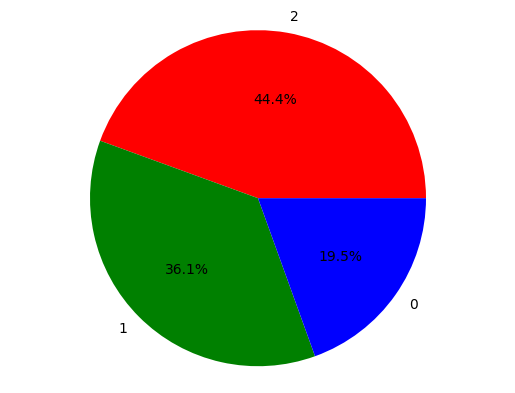

In [33]:
import matplotlib.pyplot as plt

# Calcular a contagem de cada cluster no DataFrame
counts = df_copy['cluster'].value_counts()

# Criar uma lista com as cores para cada fatia da pizza
colors = ['red', 'green', 'blue']

# Criar o gráfico de pizza com as cores e a contagem calculada
plt.pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, kmeans_labels, silhouette_avg):
    n_clusters = len(set(kmeans_labels))
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(df, plot=False):
    #df = df.select_dtypes(include=[np.number])
    kmeans_dict = {3: KMeans(n_clusters=3, random_state=0).fit(df)}
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update({silhouette_avg : n_clusters})
    
        if(plot): plotSilhouette(df, kmeans_labels, silhouette_avg)
        
    printAvg(avg_dict)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


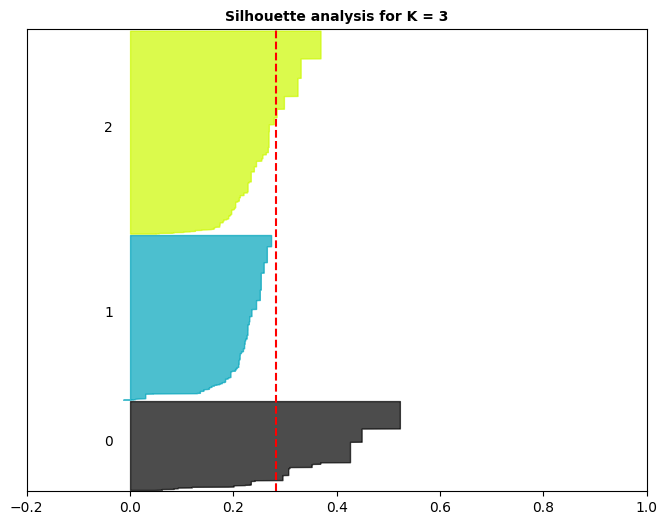

Avg: 0.2817	K:3


In [35]:
silhouette(df, plot=True)

In [36]:
df_copy.columns

Index(['status', 'denominacao', 'tipo_vinculo-2', 'sigla-2', 'cluster'], dtype='object')

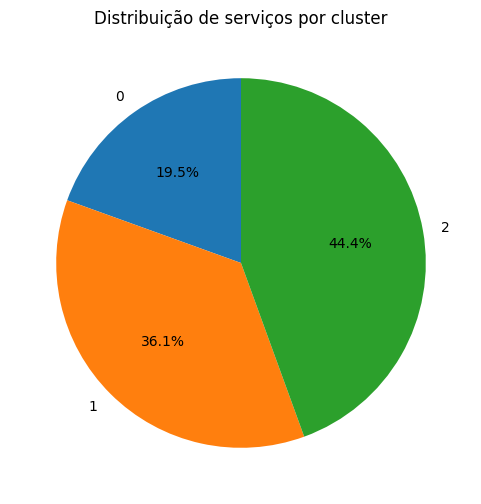

In [37]:
import matplotlib.pyplot as plt

# Agrupa o número de serviços por cluster
services_per_cluster = df_copy.groupby('cluster').size().reset_index(name='denominacao')

# Cria a figura e o eixo para o gráfico de pizza
fig, ax = plt.subplots(figsize=(6, 6))

# Plota o gráfico de pizza
ax.pie(services_per_cluster['denominacao'], labels=services_per_cluster['cluster'], autopct='%1.1f%%', startangle=90)

# Define o título do gráfico
ax.set_title('Distribuição de serviços por cluster')

# Mostra o gráfico
plt.show()


In [38]:
modalidade_frequencia = df_copy.groupby(['cluster', 'denominacao']).size().reset_index(name='Frequencia')
modalidade_frequencia = modalidade_frequencia.sort_values(by='Frequencia', ascending=False)


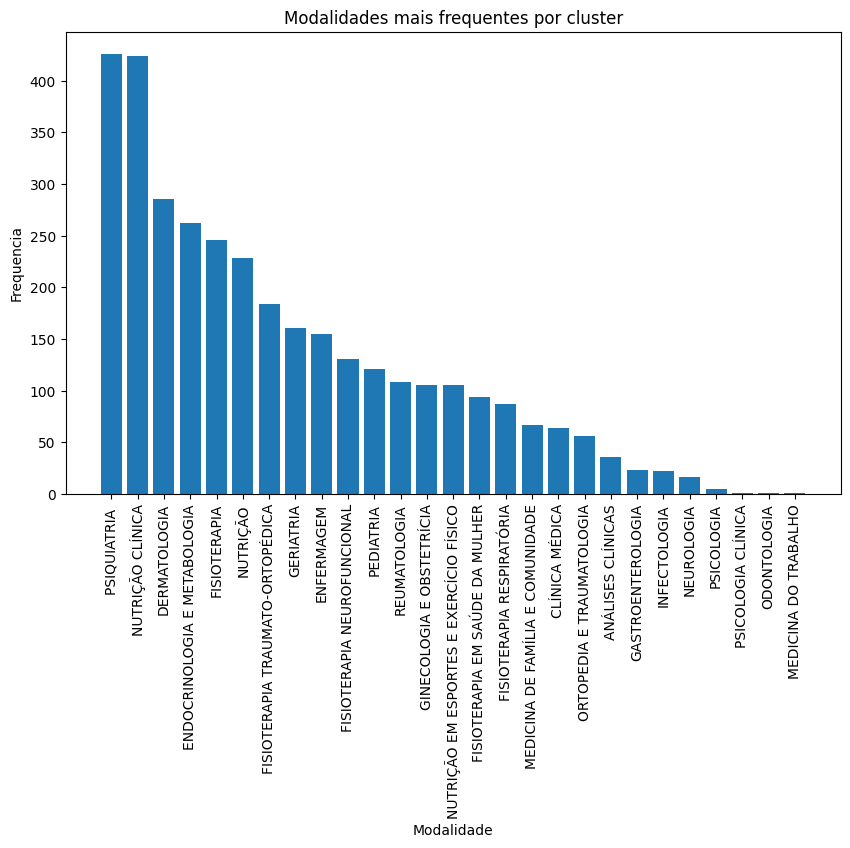

In [39]:

plt.figure(figsize=(10, 6))
plt.bar(modalidade_frequencia['denominacao'], modalidade_frequencia['Frequencia'])
plt.xlabel('Modalidade')
plt.ylabel('Frequencia')
plt.title('Modalidades mais frequentes por cluster')
plt.xticks(rotation=90)
plt.show()

<ipython-input-40-1d5a00b0f7a2>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  modalidade_frequencia.pivot('denominacao', 'cluster', 'Frequencia').plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

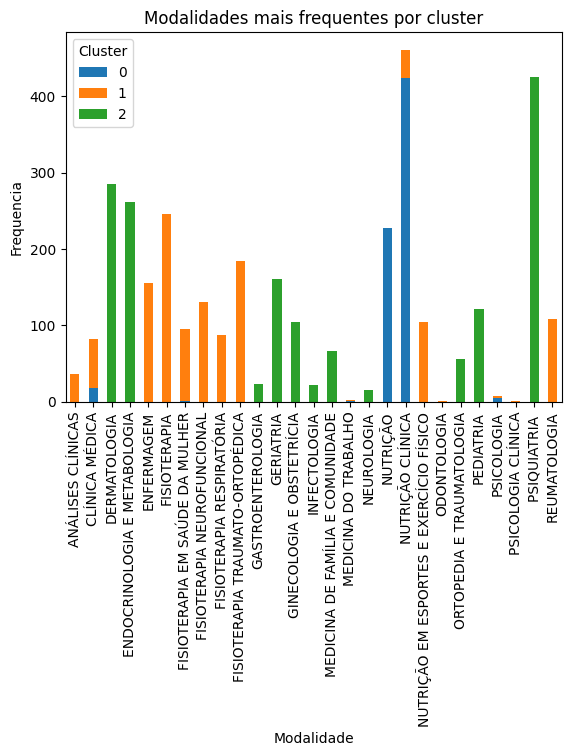

In [40]:

modalidade_frequencia = df_copy.groupby(['cluster', 'denominacao']).size().reset_index(name='Frequencia')

modalidade_frequencia = modalidade_frequencia.sort_values(by='cluster', ascending=False)

plt.figure(figsize=(10, 6))
modalidade_frequencia.pivot('denominacao', 'cluster', 'Frequencia').plot(kind='bar', stacked=True)
plt.xlabel('Modalidade')
plt.ylabel('Frequencia')
plt.title('Modalidades mais frequentes por cluster')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.show()

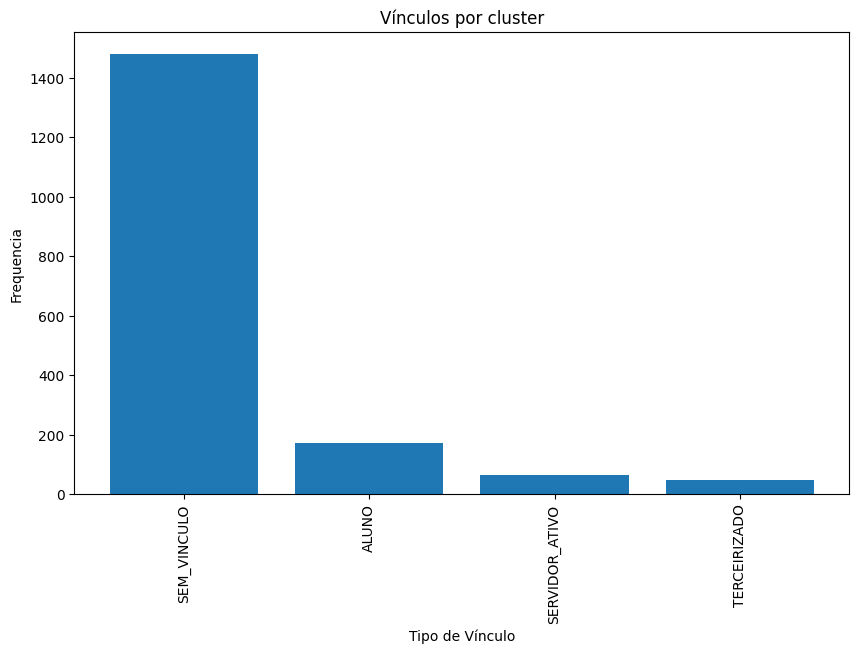

In [47]:
modalidade_frequencia = df_copy.groupby(['cluster', 'tipo_vinculo-2']).size().reset_index(name='Frequencia')
modalidade_frequencia = modalidade_frequencia.sort_values(by='Frequencia', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(modalidade_frequencia['tipo_vinculo-2'], modalidade_frequencia['Frequencia'])
plt.xlabel('Tipo de Vínculo')
plt.ylabel('Frequencia')
plt.title('Vínculos por cluster')
plt.xticks(rotation=90)
plt.show()

<ipython-input-49-c4d814fdc1a8>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  modalidade_frequencia.pivot('tipo_vinculo-2', 'cluster', 'Frequencia').plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

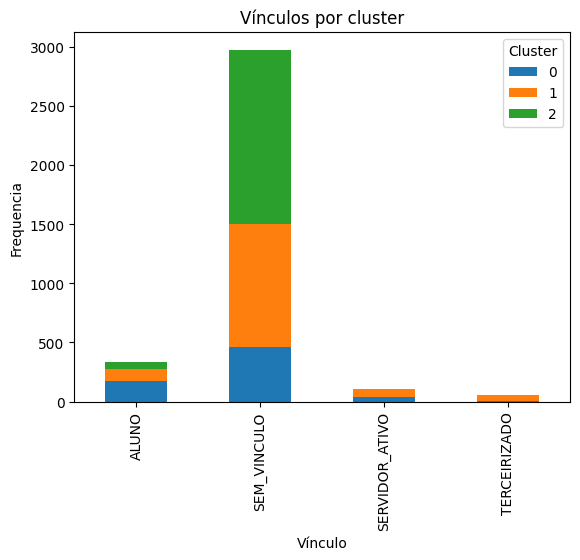

In [49]:
modalidade_frequencia = df_copy.groupby(['cluster', 'tipo_vinculo-2']).size().reset_index(name='Frequencia')

modalidade_frequencia = modalidade_frequencia.sort_values(by='cluster', ascending=False)

plt.figure(figsize=(10, 6))
modalidade_frequencia.pivot('tipo_vinculo-2', 'cluster', 'Frequencia').plot(kind='bar', stacked=True)
plt.xlabel('Vínculo')
plt.ylabel('Frequencia')
plt.title('Vínculos por cluster')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.show()

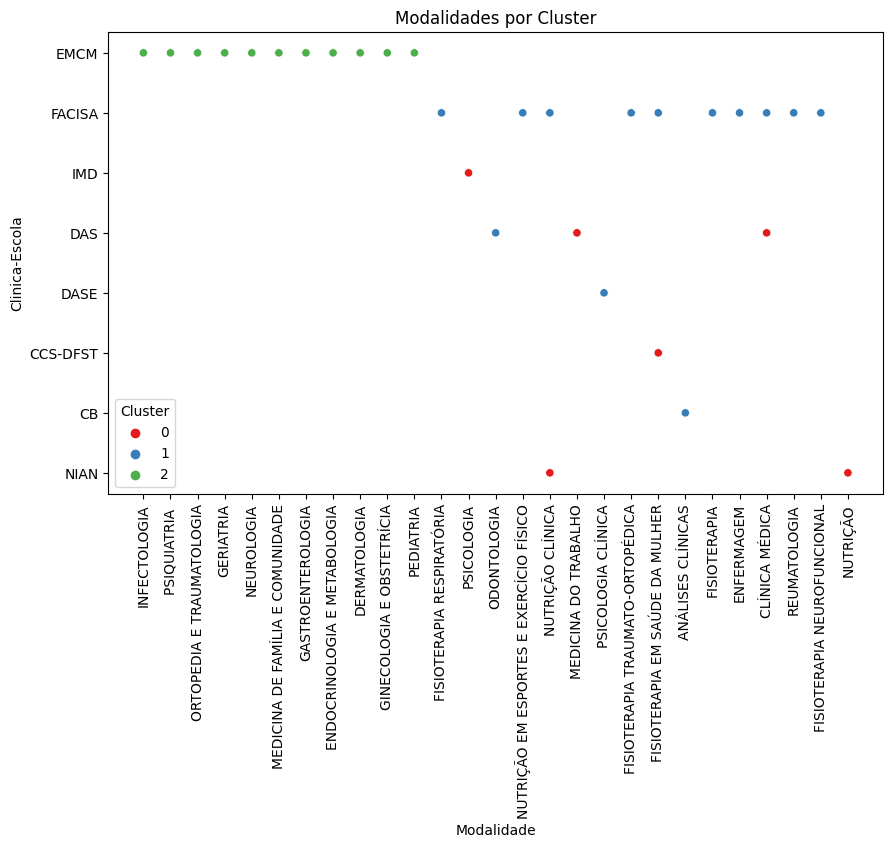

In [61]:
import seaborn as sns

# Ordenar o dataframe por cluster
modalidade_frequencia = modalidade_frequencia.sort_values(by=['cluster'], ascending=[False])

# Plotar o gráfico de dispersão com as cores dos clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='denominacao', y='sigla-2', hue='cluster', data=modalidade_frequencia, palette='Set1')
plt.xlabel('Modalidade')
plt.ylabel('Clinica-Escola')
plt.title('Modalidades por Cluster')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.show()



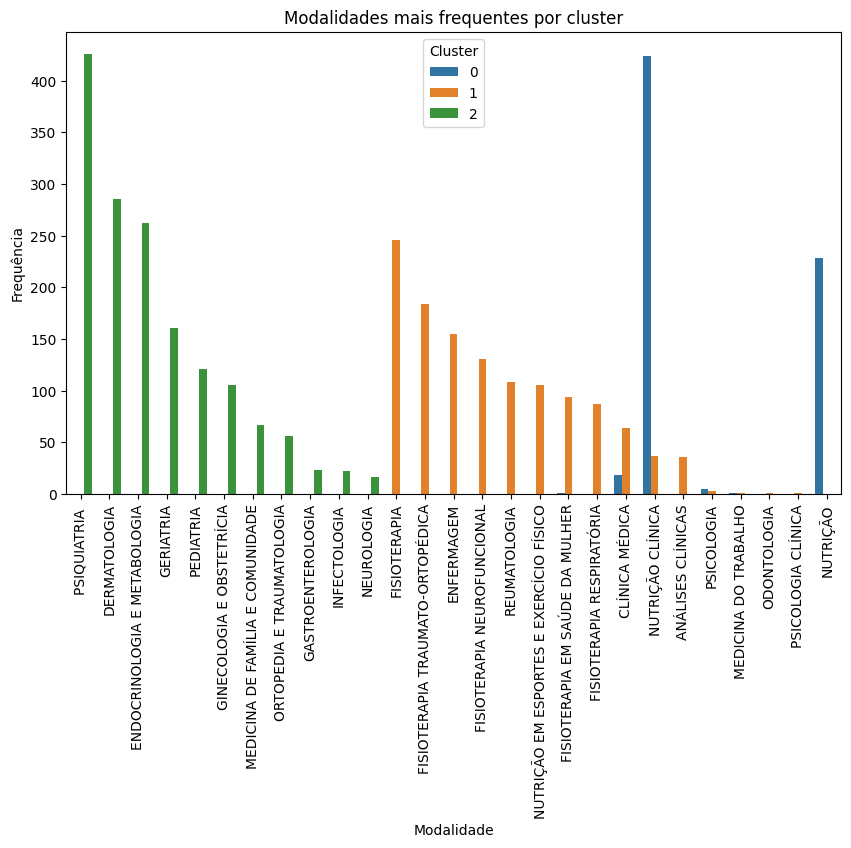

In [57]:
import seaborn as sns

modalidade_frequencia = df_copy.groupby(['cluster', 'denominacao']).size().reset_index(name='Frequencia')

# Ordenar o dataframe por cluster e frequência
modalidade_frequencia = modalidade_frequencia.sort_values(by=['cluster', 'Frequencia'], ascending=[False, False])

# Plotar o gráfico de barras com as cores das regiões
plt.figure(figsize=(10, 6))
sns.barplot(x='denominacao', y='Frequencia', hue='cluster', data=modalidade_frequencia)
plt.xlabel('Modalidade')
plt.ylabel('Frequência')
plt.title('Modalidades mais frequentes por cluster')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.show()
